Broj povezanih komponenti: 1


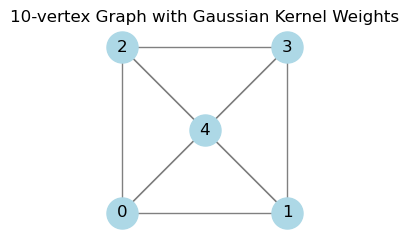

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

# Step 1: Create 10 random points in 2D space
np.random.seed(5)

points = np.array([
    [1, 1], [2, 1], [1, 2], [2, 2], [1.5, 1.5]])


n = len(points)
# Step 2: Compute pairwise distances
distances = squareform(pdist(points))

# Step 3: Compute affinity matrix using Gaussian (RBF) kernel
sigma = 0.5
W = np.exp(-distances**2 / (2 * sigma**2))
np.fill_diagonal(W, 0)  # zero diagonal for no self-loops


# Visualization: Plot graph
G =nx.complete_graph(n)
print("Broj povezanih komponenti:", nx.number_connected_components(G))

for i in range(n):
    G.add_node(i, pos=points[i])
for i in range(n):
    for j in range(i + 1, n):
        if W[i, j] > 0.1:
            G.add_edge(i, j, weight=W[i, j])


pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(2, 2))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title("10-vertex Graph with Gaussian Kernel Weights")
plt.axis('equal')
plt.show()


Affinity matrix W:
 [[0.   0.01 0.   0.   0.   0.   0.   0.01]
 [0.01 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.01 0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.01 0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.01 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.01]
 [0.01 0.   0.   0.   0.   0.   0.01 0.  ]]
Adjacency matrix:
 [[0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0.]]


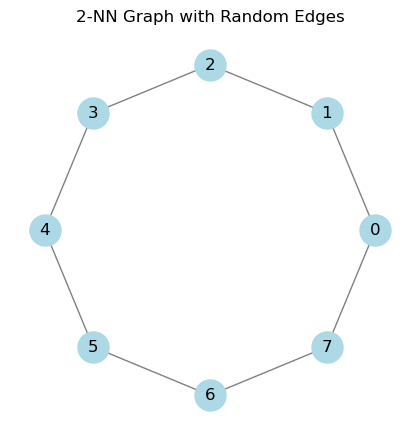

: 

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import random

np.random.seed(6)  # For reproducibility

n = 8
radius = 2
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
points = np.c_[radius * np.cos(angles), radius * np.sin(angles)]

# Compute pairwise distances
distances = squareform(pdist(points))

# kNN adjacency matrix (k=2 for example)
k = 2
A = np.zeros((n, n))
for i in range(n):
    knn_idx = np.argsort(distances[i])[1:k+1]  # skip self (distance 0)
    for j in knn_idx:
        A[i, j] = 1
        A[j, i] = 1  # make symmetric (undirected)

# Add random connections
num_random_edges = 4  # Number of random edges to add
edges_added = 0
while edges_added < num_random_edges:
    i, j = np.random.choice(n, 2, replace=False)
    if A[i, j] == 0:
        A[i, j] = 1
        A[j, i] = 1
        edges_added += 1
        
distances = squareform(pdist(points))

# Step 3: Compute affinity matrix using Gaussian (RBF) kernel
sigma = 0.5
W = np.exp(-distances**2 / (2 * sigma**2))
np.fill_diagonal(W, 0)  # zero diagonal for no self-loops
print("Affinity matrix W:\n", np.round(W,2))


print("Adjacency matrix:\n", A)

# Visualization: Plot kNN + random graph
G = nx.Graph()
for i in range(n):
    G.add_node(i, pos=points[i])
for i in range(n):
    for j in range(i + 1, n):
        if A[i, j]:
            G.add_edge(i, j)

pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(4, 4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title(f"{k}-NN Graph with Random Edges")
plt.axis('equal')
plt.show()